In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import time


# load dataset
train_datagen = ImageDataGenerator(None)
train_generator = train_datagen.flow_from_directory(
        'D:/OCT-Image/OCT2017/check_train', # train_image_path
        target_size=(299, 299), # image_size
        batch_size=16, # train_img / batch_size = 1 epoch
        class_mode='categorical')

val_datagen = ImageDataGenerator(None)
val_generator = val_datagen.flow_from_directory(
        'D:/OCT-Image/OCT2017/check_val', # val_image_path
        target_size=(299, 299), # image_size
        batch_size=16, # val_img / batch_size = 1 epoch
        class_mode='categorical')

# model 구성
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(299,299,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
print(model.summary())

# model 학습과정설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


print("start train")
start = time.time() # 현재시간 측정
history = model.fit_generator(train_generator,
                              epochs=100,
                              validation_data=val_generator)

print("time :", (time.time() - start) / 60) # 학습하는데 걸리는 시간(현재시간 - 아까 측정한 시간)
model.save('Check_Model_1.h5') # 모델 저장시키기

Using TensorFlow backend.


Found 800 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 299, 299, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_1 (Dense)        

## Accuracy, Loss 그래프로 확인

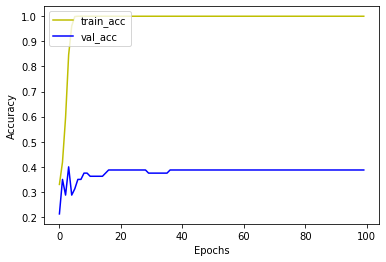

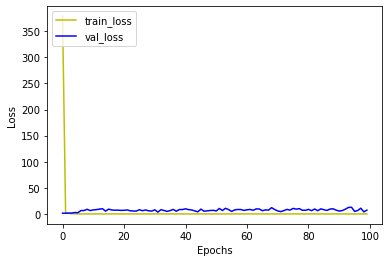

In [2]:
import matplotlib.pyplot as plt


plt.figure("train_graph")
plt.plot(history.history['acc'], 'y', label='train_acc')
plt.plot(history.history['val_acc'], 'b', label='val_acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# val 그래프
plt.figure("val_graph")
plt.plot(history.history['loss'], 'y', label='train_loss')
plt.plot(history.history['val_loss'],'b', label='val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()